<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장: 수상한 생선을 조심하라!

In [75]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) # 훈련
kn.score(fish_data, fish_target) # 평가

1.0

In [76]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

kn.fit(train_input, train_target) # 훈련
kn.score(test_input, test_target) # 평가

0.0

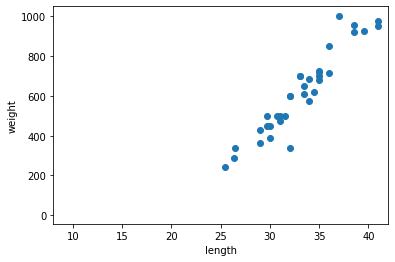

In [77]:
import matplotlib.pyplot as plt

plt.scatter(kn._fit_X[:,0], kn._fit_X[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(8, 42)
plt.ylim(-43, 1050)
plt.show()

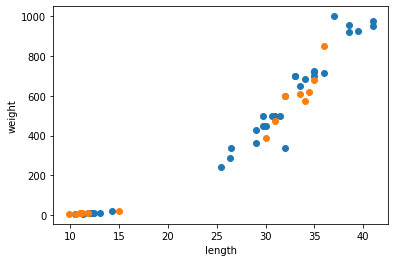

In [78]:
import numpy as np

np.random.seed(42) # 매번 동일한 결과를 얻기 위함
index = np.arange(len(length))
np.random.shuffle(index)

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [79]:
print(f'전체 데이터 중 도미 비율 = {sum(target_arr)/len(target_arr)*100: .1f}%')
print(f'훈련 세트 중 도미 비율 = {sum(train_target)/len(train_target)*100: .1f}%')
print(f'테스트 세트 중 도미 비율 = {sum(test_target)/len(test_target)*100: .1f}%')

전체 데이터 중 도미 비율 =  71.4%
훈련 세트 중 도미 비율 =  77.1%
테스트 세트 중 도미 비율 =  57.1%


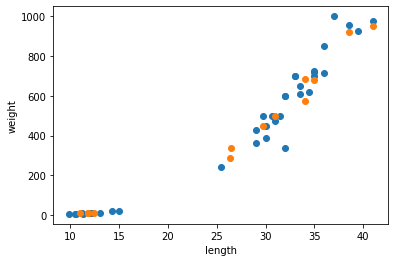

전체 데이터 중 도미 비율 =  71.4%
훈련 세트 중 도미 비율 =  72.2%
테스트 세트 중 도미 비율 =  69.2%
[0 0 1 0 1 0 1 1 1 1 1 1 1]


In [80]:
fish_data = np.array(fish_data)
fish_target = np.array(fish_target)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(f'전체 데이터 중 도미 비율 = {sum(target_arr)/len(target_arr)*100: .1f}%')
print(f'훈련 세트 중 도미 비율 = {sum(train_target)/len(train_target)*100: .1f}%')
print(f'테스트 세트 중 도미 비율 = {sum(test_target)/len(test_target)*100: .1f}%')

print(test_target)

In [81]:
kn.fit(train_input, train_target) # 훈련은 train_*로
kn.score(test_input, test_target) # 평가는 test_*로

1.0

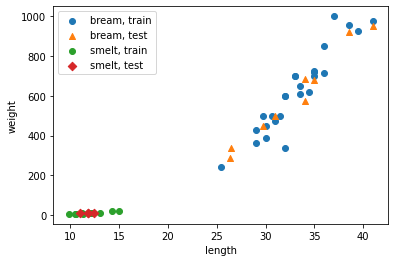

In [82]:
idx_bream_train = np.where(train_target == 1)
idx_smelt_train = np.where(train_target == 0)

test_result = kn.predict(test_input)
idx_bream_test = np.where(test_result == 1)
idx_smelt_test = np.where(test_result == 0)

plt.scatter(*train_input[idx_bream_train, :].T, label='bream, train')
plt.scatter(*test_input[idx_bream_test, :].T, marker='^', label='bream, test')
plt.scatter(*train_input[idx_smelt_train, :].T, label='smelt, train')
plt.scatter(*test_input[idx_smelt_test, :].T, marker='D', label='smelt, test')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 02-2 Data preprocessing

What would be the model's prediction for a fish with 25 cm and 150 g? Anyone would say it must be bream, but the model says it's smelt. 

The point is distance. The scale of length is much smaller than weight. Then the distance of two points is dominated by weight whilest the effect of length would be underestimated. 

This is why the data should be proprecessed.



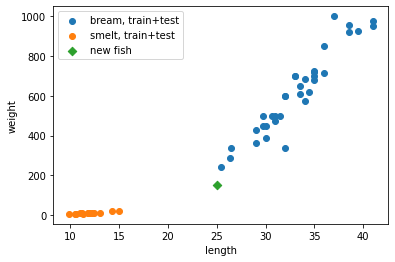

In [83]:
plt.scatter(bream_length, bream_weight, label='bream, train+test')
plt.scatter(smelt_length, smelt_weight, label='smelt, train+test')
plt.scatter(25, 150, marker='D', label='new fish')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [84]:
kn.predict([[25, 150]])

array([0])

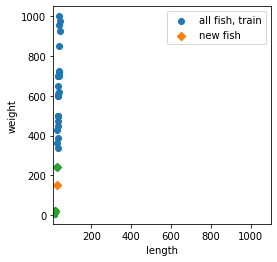

In [85]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(*train_input.T, label='all fish, train')
plt.scatter(25, 150, marker='D', label='new fish')
plt.scatter(*train_input[indexes, :].T, marker='D')
plt.axis('square')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [86]:
kn.n_neighbors = 1
kn.predict([[25, 150]])

array([1])

In [87]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

In [88]:
print(np.mean(train_scaled, axis=0), np.std(train_scaled, axis=0))
print(np.mean(test_scaled, axis=0), np.std(test_scaled, axis=0))

[ 5.24271984e-16 -1.97372982e-16] [1. 1.]
[-0.0914212 -0.1118907] [1.05453924 1.0125999 ]


In [89]:
kn.n_neighbors = 5
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [90]:
new = ([25, 150] - mean) / std
print(kn.predict([new]))

[1]


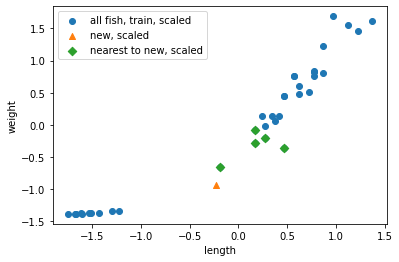

In [92]:
distances, indexes = kn.kneighbors([new])
plt.scatter(*train_scaled.T, label='all fish, train, scaled')
plt.scatter(*new.T, marker='^', label='new, scaled')
plt.scatter(*train_scaled[indexes, :].T, marker='D', label='nearest to new, scaled')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()